The ultimate goal of every team in the NBA is to win a championship, but to get there, you obviously need to get players good
enough to win it. However, finding those good players is incredibly difficult: there are so many stats and external factors that need to be taken into account, and with the amount of new prospects continously rising, especially internationall, sometimes it feels like finding a good player just comes down to dumb luck. Just look at the most recent NBA champions, the Denver Nuggets. Their best player is Nikola Jokic, a player who was drafted 41st, and is now a two-time MVP. Meanwhile, the 2nd overall pick in his draft, Jabari Parker, hasn't been on an NBA roster since 2022. As such, we wanted to see if there were any stat trends that could lead to predicting a player's success. 

We have retreived data from NBA.com using this client API:
https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb
It contained the basic statistics of every year of every NBA player's career from 1946-2023

After pulling the data from NBA.com, we also scraped data from basketball-reference.com from
https://www.basketball-reference.com/allstar/

and downloaded csv files from:
https://www.basketball-reference.com/awards/mvp.html
https://www.basketball-reference.com/awards/roy.html
https://www.basketball-reference.com/awards/dpoy.html
https://www.basketball-reference.com/awards/smoy.html
https://www.basketball-reference.com/awards/mip.html
https://www.basketball-reference.com/awards/all_league.html
https://www.basketball-reference.com/awards/all_rookie.html
https://www.basketball-reference.com/awards/all_defense.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

In [10]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/Rnway47/NBA_Project/main/raw_data.csv") #can replace with the file name you have in your jhub
raw_data

,Unnamed: 0,Unnamed: 1,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,0,0,988,1996-97,0.0,1.610613e+09,HOU,22.0,64.0,0.0,...,0.646,32.0,62.0,94.0,155.0,39.0,12.0,102.0,107.0,251.0
1,1,1,988,1997-98,0.0,1.610613e+09,ATL,23.0,12.0,0.0,...,0.800,1.0,5.0,6.0,5.0,7.0,2.0,6.0,6.0,10.0
2,2,2,988,1998-99,0.0,1.610613e+09,PHX,24.0,1.0,0.0,...,1.000,0.0,2.0,2.0,3.0,2.0,0.0,1.0,1.0,12.0
3,3,3,988,1999-00,0.0,1.610613e+09,PHX,25.0,79.0,15.0,...,0.839,25.0,105.0,130.0,170.0,49.0,13.0,92.0,129.0,381.0
4,4,4,988,2000-01,0.0,1.610613e+09,GSW,26.0,2.0,0.0,...,0.000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24151,24151,1,201193,2007-08,0.0,1.610613e+09,CHI,23.0,11.0,0.0,...,0.000,0.0,4.0,4.0,1.0,0.0,3.0,2.0,4.0,13.0
24152,24152,2,201193,2007-08,0.0,0.000000e+00,TOT,23.0,14.0,0.0,...,0.000,0.0,5.0,5.0,1.0,0.0,3.0,4.0,4.0,15.0
24153,24153,3,201193,2008-09,0.0,1.610613e+09,CHI,24.0,2.0,0.0,...,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
24154,24154,4,201193,2008-09,0.0,1.610613e+09,NYK,24.0,2.0,0.0,...,0.500,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,5.0


All of theese abbreviations represent stats pulled from the NBA API or that use basic calculations on those stats
**GP**: Game Played <br>
**GS**: Game Started <br>
**MIN**: Minutes Played <br>
**FGM**: Field Goals Made <br>
**FGA**: Field Goals Attempted <br>
**FG_PCT**: Successful Field Goal Percentage <br>
**FG3M**: 3-point Shots Made <br>
**FG3A**: 3-point Shots Attempted <br>
**FG3_PCT**: Successful 3-point Shots percentage <br>
**FTM**: Free Throws Made <br>
**FTA**: Free Throws Attempted <br>
**FT_PCT**: Successful Free Throws Percentage <br>
**OREB**: Offensive Rebounds <br>
**DREB**: Defensive Rebounds <br>
**REB**: Total Rebounds <br>
**AST**: Assists <br>
**ST**: Steals <br>
**BLK**: Blocked Shots <br>
**TO**: Turnovers <br>
**PF**: Personal Fouls <br>
**PTS**: Points Scored <br>
**YSE**: Years since player has entered the NBA <br>
**PPG**: Points per Game <br>
**APG**: Assists per Game <br>
**TRPG**: Total Rebounds per Game <br>
**ORPG**: Offensive Rebounds per Game <br>
**DRPG**: Defensive Rebounds per Game <br>
**BPG**: Blocks per Game <br>
**SPG**: Steals per Game <br>
**TPG**: Turnovers per Game <br>
**FPG**: Fouls per Game <br>
**3PG**: 3-point Shots per Game <br>
**MPG**: Minutes per Game <br>
**YEAR**: Year of the Season <br>

These are more advanced stats that we have calculated <br>
**EFG_RATE**: Effective Field Goal Percentage ((FGM + 0.5 * FG3M) / FGA ) <br>
**FTA_RATE**: Percentage of Free Throws Attempted (FTA / FGA) <br>
**TOV_RATE**: Turnover rate (TOV / (FGA + (0.44 * FTA) + AST + TOV)) <br>
**TS_RATE**: True Shooting Rate (PTS / 2(FGA + (0.44 * FTA)) <br>

These are categories that use data pulled from basketball-reference.com and are one-hot encoded
**ALLSTAR**: Player made this season's All Star Team (1 means yes, 0 means no) <br>
**ALLNBA**: Player made one of this season's All-NBA Teams (1 means yes, 0 means no) <br>
**ALLDEF**: Player made on of this season's All-Defense Team (1 means yes, 0 means no) <br>
**ALLROOKIE**: Playe made this season's All-Rookie Team (1 means yes, 0 means no) <br>
**MIP**: Player is this season's Most Improved Player (1 means yes, 0 means no) <br>
**SIXTHM**: Player is this season's best Sixth Man (Bench Player) (1 means yes, 0 means no) <br>
**DPOY**: Player is this season's Defensive Player of the Year (1 means yes, 0 means no) <br>
**ROTY**: Player is this season's Rookie of the Year (1 means yes, 0 means no) <br>
**MVP**: Player is this season's Most Valuable Player (1 means yes, 0 means no) <br>


Some players, especially players from before 1976, have empty values for many columns. This is due to some statistics not being counted until more recently. For example the 3-point line was only introduced in the 1979-1980 season[1], and turnovers only started being recorded in the 1977-1978 season[2]<br>

[1] https://www.sportingnews.com/ca/nba/news/nba-history-birth-evolution-3-point-line-stephen-curry-reggie-miller-ray-allen/zlqxs2380v7o1pn4oeumjhsmh

[2] https://en.wikipedia.org/wiki/Turnover_(basketball)

Raw data collection files and some feature engineering can be seen in the included folders. Now, it is time to clean up the data, visualize the data, and perform more feature engineering to keep the most relevant data.

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/Rnway47/NBA_Project/main/temp_final.csv")
data

,Unnamed: 0,YSE,PLAYER_ID,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FGM,...,ALLROOKIE,MIP,SIXTHM,DPOY,ROTY,MVP,EFG_RATE,FTA_RATE,TOV_RATE,TS_RATE
0,0,1,77752,1947-48,1610610036,WAS,24,37,0,63,...,0,0,0,0,0,0,0.000000,0.229572,0.000000,0.275657
1,1,2,77752,1948-49,1610610036,WAS,25,50,0,70,...,0,0,0,0,0,0,0.000000,0.361314,0.000000,0.300731
2,2,3,77752,1949-50,1610610036,WAS,26,68,0,162,...,0,0,0,0,0,0,0.000000,0.383743,0.000000,0.383297
3,3,4,77752,1950-51,1610610036,WAS,27,17,0,21,...,0,0,0,0,0,0,0.000000,0.382353,0.000000,0.281135
4,4,1,988,1996-97,1610612745,HOU,22,64,982,100,...,0,0,0,0,0,0,0.456332,0.283843,19.821220,0.487189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23798,23798,7,293,1994-95,1610612752,NYK,29,76,2150,352,...,2,0,0,0,0,0,0.475904,0.431058,12.719784,0.543503
23799,23799,8,293,1995-96,1610612752,NYK,30,41,890,114,...,2,0,0,0,0,0,0.391156,0.350340,14.208516,0.446481
23800,23800,9,293,1995-96,1610612759,SAN,30,32,826,130,...,2,0,0,0,0,0,0.457746,0.211268,11.497190,0.492912
23801,23801,10,293,1995-96,0,TOT,30,73,1716,244,...,2,0,0,0,0,0,0.423875,0.282007,12.915489,0.468663


In [12]:
#Remove the 2nd column (no meaning toward the database), SEASON_ID column (Column YEAR is created) and fill NaN value with 0
data.drop(columns=data.columns[0], axis=1,  inplace=True)
data.drop(["SEASON_ID"], axis=1,  inplace=True)
data.fillna(0, inplace=True)
print(data.shape)

#Many of the new attributes in the new database are introduced in modern NBA games. Turnovers are not tracked until 1978, we need to drop NBA players' stats before 1978
recent_data = data[data.YEAR>=1978]
print(recent_data.shape)

(23803, 51)
(19214, 51)


In [13]:
#Start observing and visualizing data to see if more feature engineering needs to be done
recent_data.describe()

,YSE,PLAYER_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,ALLROOKIE,MIP,SIXTHM,DPOY,ROTY,MVP,EFG_RATE,FTA_RATE,TOV_RATE,TS_RATE
count,19214.000000,1.921400e+04,1.921400e+04,19214.000000,19214.000000,19214.000000,19214.000000,19214.000000,19214.000000,19214.000000,...,19214.000000,19214.000000,19214.000000,19214.000000,19214.000000,19214.000000,19214.000000,19214.000000,19214.000000,19214.000000
mean,5.956854,2.474728e+05,1.431479e+09,27.036432,53.857552,1270.980223,206.261996,444.795201,0.442593,28.618039,...,0.026907,0.001978,0.002082,0.002134,0.002498,0.002394,0.460479,0.308259,12.031501,0.512340
std,4.520932,5.043312e+05,5.063988e+08,4.381132,25.284319,916.235698,185.622527,386.485128,0.096083,45.329876,...,0.208732,0.044429,0.045581,0.046146,0.049921,0.048872,0.126317,0.210469,5.255845,0.095471
min,1.000000,2.000000e+00,0.000000e+00,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.112000e+03,1.610613e+09,24.000000,35.000000,418.000000,51.000000,118.000000,0.406000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.436682,0.193283,9.373603,0.481379
50%,5.000000,7.653900e+04,1.610613e+09,26.000000,62.000000,1196.000000,160.000000,353.000000,0.447000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.481225,0.278183,11.414575,0.523144
75%,9.000000,2.016090e+05,1.610613e+09,30.000000,76.000000,2017.750000,315.000000,682.000000,0.490000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.519567,0.383284,13.933575,0.559313
max,28.000000,1.641645e+06,1.610613e+09,94.000000,85.000000,3638.000000,1098.000000,2279.000000,1.000000,402.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,6.000000,100.000000,1.500000


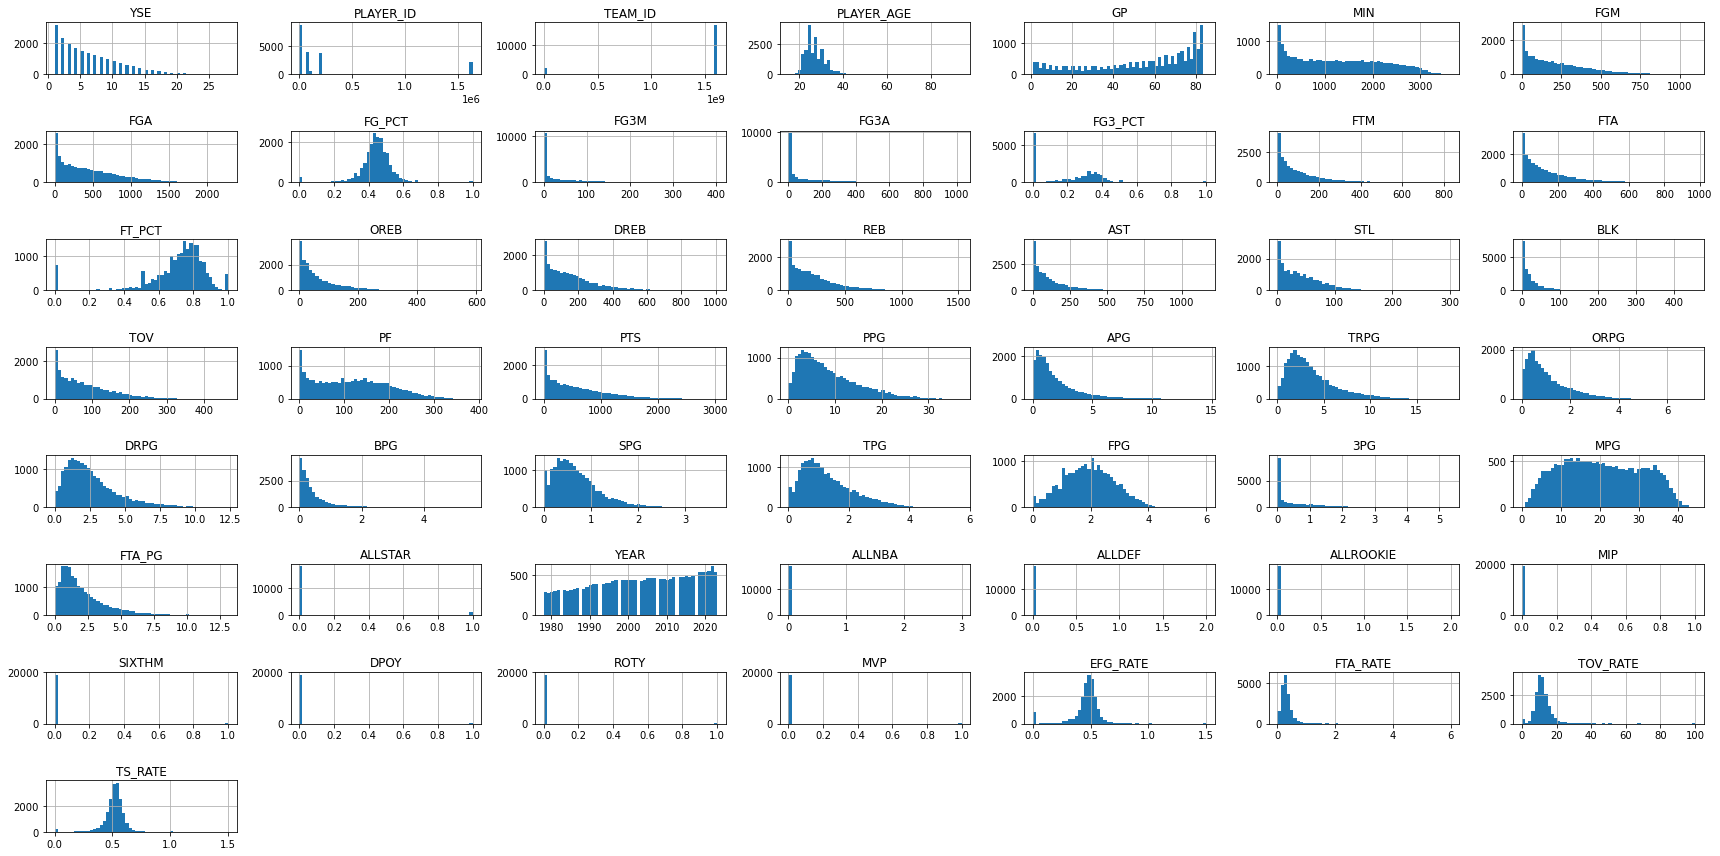

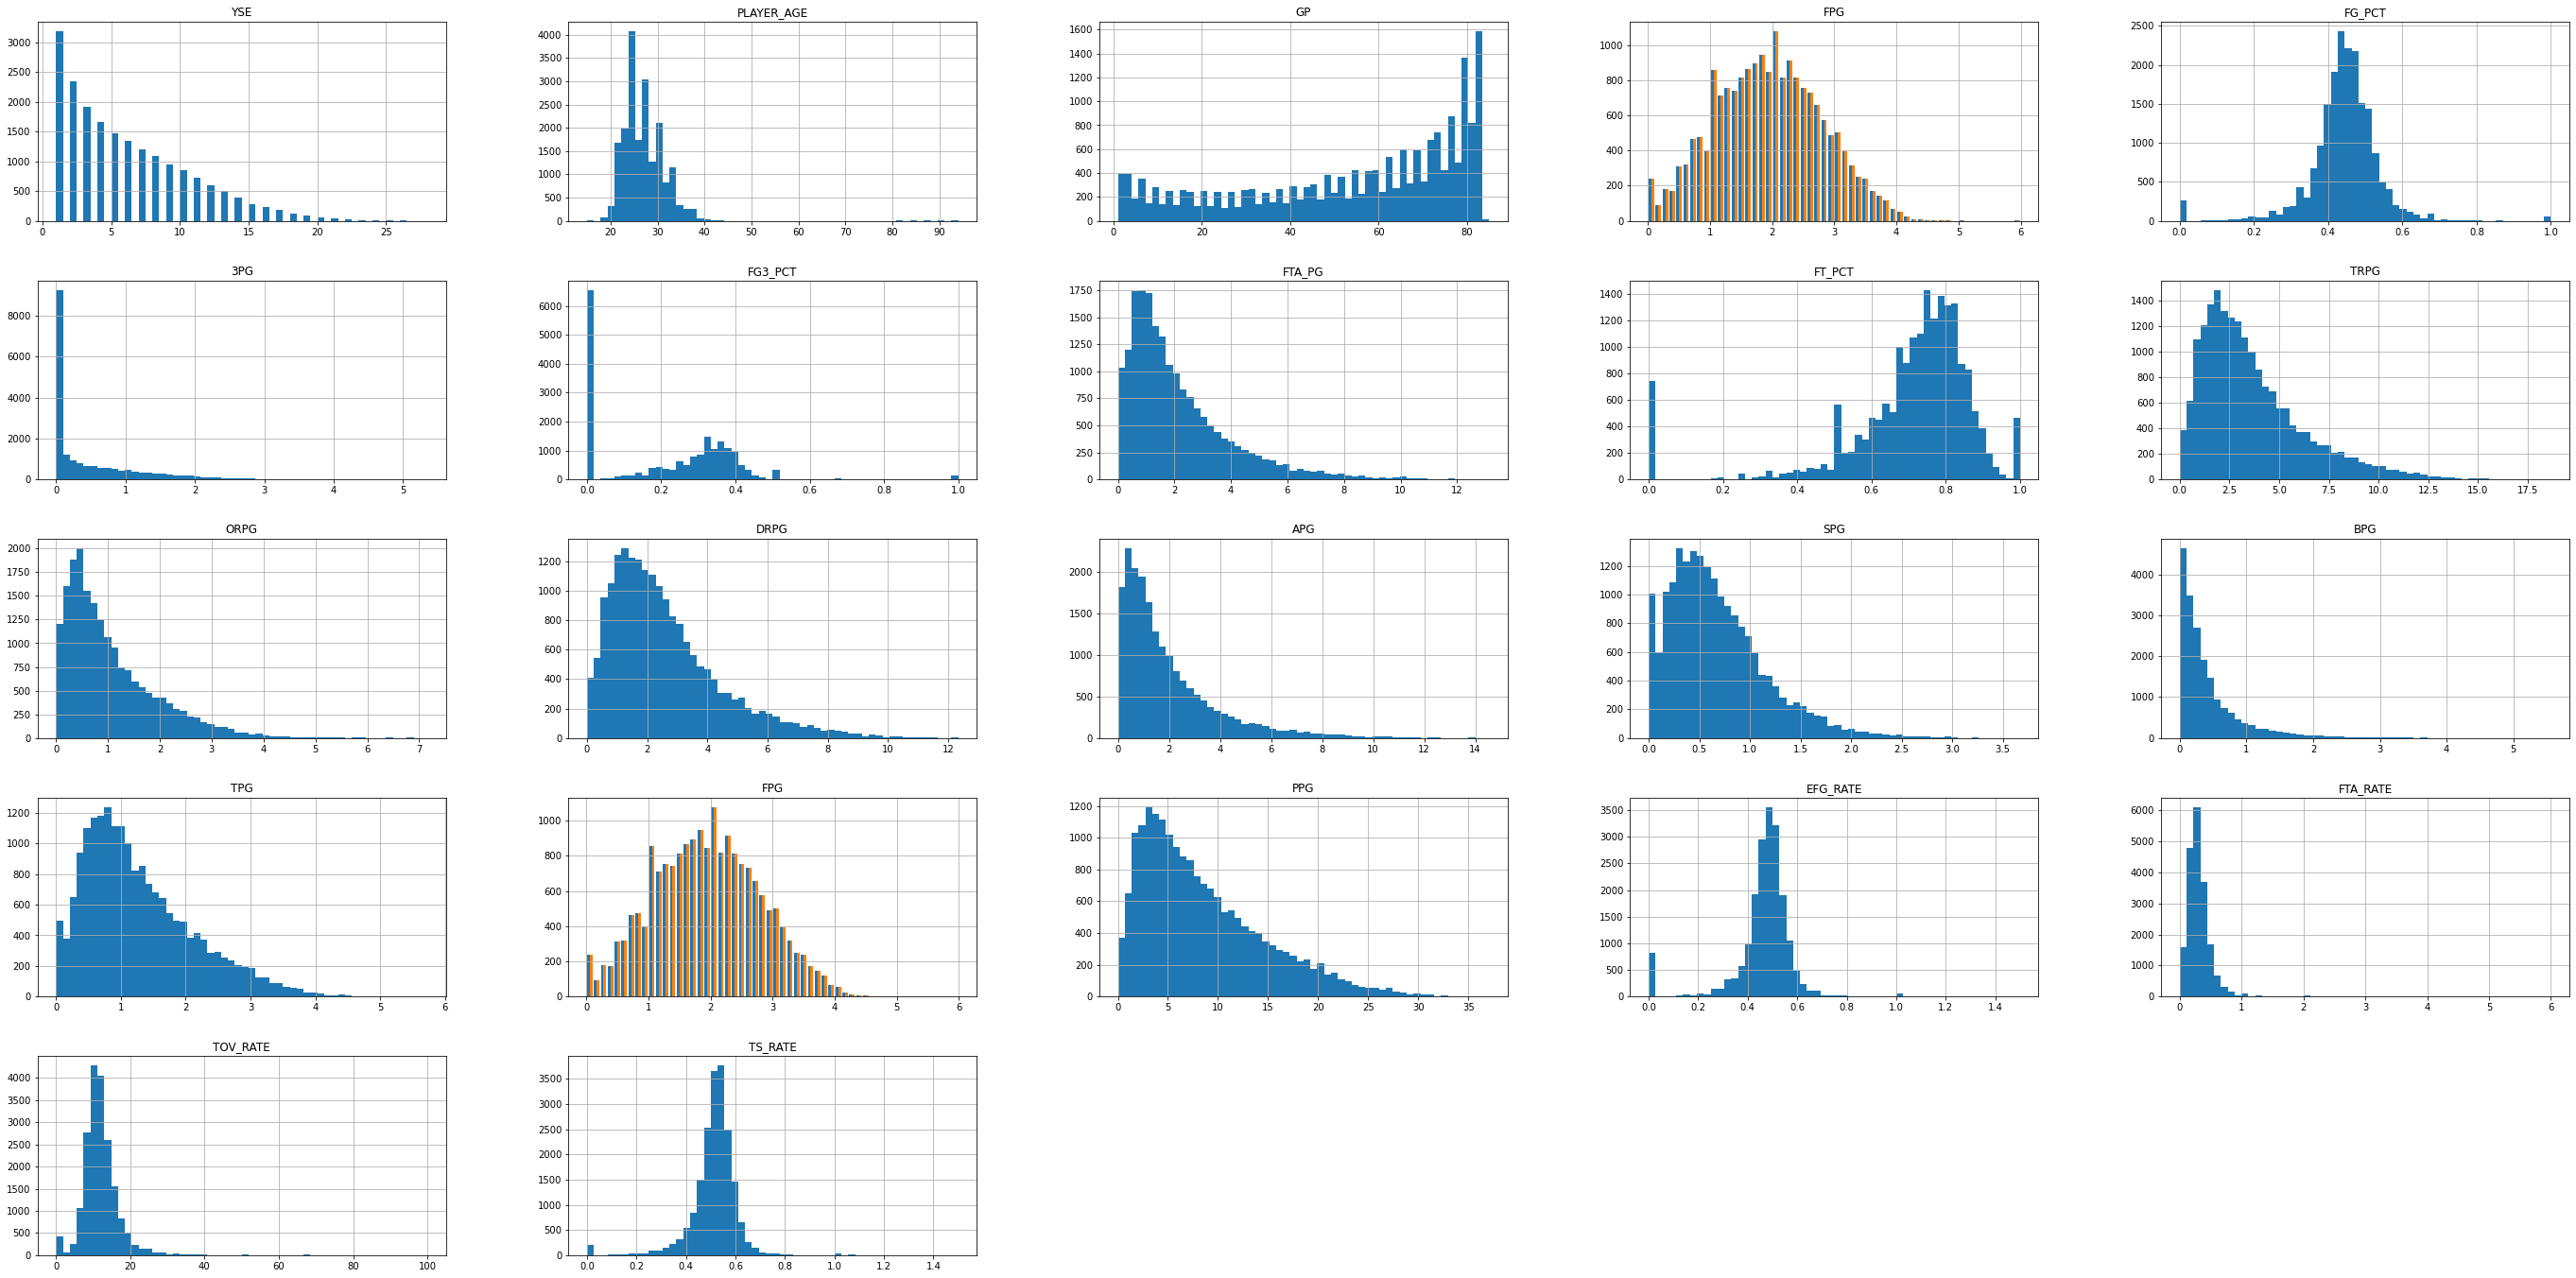

In [18]:
#Histograms can be helpful
recent_data.hist(bins=54, figsize=(24, 12))
plt.tight_layout()
plt.show()
#The standard deviation is pretty high for some attributes, such as MIN, FGM, FGA, and etc. We could drop some attributes for histograms
#Attributes that do not have actual numerical meanings (Team_ID, player_ID, and etc), binary values (ALLROOKIE), 
#or could be represented by other attributes are excluded (FGM can be obtained from FGA and FG_PCT)
recent_data.hist(column=["YSE", "PLAYER_AGE", "GP", "FPG", "FG_PCT", "3PG", "FG3_PCT", "FTA_PG", "FT_PCT", "TRPG", "ORPG", "DRPG", 
                        "APG", "SPG", "BPG", "TPG", "FPG", "PPG", "EFG_RATE", "FTA_RATE", "TOV_RATE", "TS_RATE"], bins=54, figsize=(48,24))
plt.show()

A lot of the ratio attributes have a small standard deviation, and these attributes are considered more important. MinMaxScaler will be chosen for the proprocessing pipeline. <br>
TOV_RATE is an attribute which represents ball control for the player. <br>
If the TOV_RATE is high, it can be interpreted as the player potentially gives more "points" to the opposing team <br>

In [39]:
#Determine if there are correlation between TOV_RATE and TRPG, ORPG, DRPG, corr() is used since it will take a while to generate charts for other visualization.
test_data = recent_data[["TOV_RATE", "TRPG", "ORPG", "DRPG"]]
test_data.corr()

,TOV_RATE,TRPG,ORPG,DRPG
TOV_RATE,1.000000,-0.032103,0.036853,-0.062565
TRPG,-0.032103,1.000000,0.898936,0.978180
ORPG,0.036853,0.898936,1.000000,0.788307
DRPG,-0.062565,0.978180,0.788307,1.000000


No strong correlation is seen between **TOV_RATE** and **Rebounds**. However: <br>
Unsurprisingly, there is a strong positive correlation between **ORPG** and **DRPG**, as typically a player who is good at one will be good at the other <br>
Negative correlation is observed between **TOV_RATE** and **TRPG** & **DRPG**. This is likely because players with higher **TRPG** and **DRPG** are Forwards or Centers, who typically do not handle the basketball as much which would lead to a lower **TOV_RATE**<br>
Surprisingly though there is a strong correlation observed between **TOV_RATE** and **ORPG** <br>
What about **EFG_RATE**, **FTA_RATE**, and **TS_RATE**? <br> 

In [40]:
new_test_data = recent_data[["TOV_RATE", "EFG_RATE", "FTA_RATE", "TS_RATE"]]
new_test_data.corr()

,TOV_RATE,EFG_RATE,FTA_RATE,TS_RATE
TOV_RATE,1.000000,-0.124313,0.195455,-0.119375
EFG_RATE,-0.124313,1.000000,0.058264,0.734915
FTA_RATE,0.195455,0.058264,1.000000,0.207803
TS_RATE,-0.119375,0.734915,0.207803,1.000000


We see slightly stronger correlation. <br>
There is a positive correlation betwwen **TOV_RATE** and **FTA_RATE** <br>
There is also a negative correlation between **TOV_RATE**, **EFG_RATE** and **TS_RATE** <br>
As well, **EFG_RATE** and **TS_RATE** have strong positive correlation <br>

**EFG_RATE** is a stat that recalculates a player's overall field goal percentage by taking into account the value of a 3-point shot vs a 2-point shot, as a good 2-point **FG_PCT** is typically considered 50% while the league average **FG3_PCT** is typically around 36% <br>
**TS_RATE** includes free throws attempted as part of it's calculation, which is very important because free throws are one of the most efficient shots in basketball. <br>
A higher **FTA_RATE** is desired when the team is playing offensively. <br>
We will start the preprocessing to predict ALLROOKIE for now<br>

In [42]:
# use train_test_split() to split the data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

train_set, test_set = train_test_split(recent_data, test_size=0.2, random_state=42)

#isolate the label
training_data = train_set.drop("ALLROOKIE", axis=1)
training_data_label = train_set["ALLROOKIE"].copy()

num_attribs = ["YSE", "YEAR", "PLAYER_AGE", "GP", "FPG", "FG_PCT", "3PG", "FG3_PCT", "FTA_PG", "FT_PCT", "TRPG", "ORPG", "DRPG", 
               "APG", "SPG", "BPG", "TPG", "FPG", "PPG", "EFG_RATE", "FTA_RATE", "TOV_RATE", "TS_RATE"]
cat_attribs = ["PLAYER_ID", "TEAM_ABBREVIATION"]

#pipeline for numerical attr
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), MinMaxScaler())

#pipeline for categorical 
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)])

pred_data_prepared = preprocessing.fit_transform(training_data)
print(preprocessing.get_feature_names_out())

['num__YSE' 'num__YEAR' 'num__PLAYER_AGE' ... 'cat__TEAM_ABBREVIATION_UTH'
 'cat__TEAM_ABBREVIATION_VAN' 'cat__TEAM_ABBREVIATION_WAS']


We can try DecisionTreeRegressor or RandomForestRegressor, and decide which one is better from the value of RMSE

In [54]:
#For DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#train the model using decisiontreetregressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor())
tree_reg.fit(training_data, training_data_label)

test_data = test_set.drop("ALLROOKIE", axis=1)
test_label = test_set["ALLROOKIE"].copy()

test_pred = tree_reg.predict(test_data) #testing with the test set
tree_rmse = mean_squared_error(test_label, test_pred,squared=False) #compare the prediction and the actual label
tree_rmse

0.2001820664919585

A relatively low RMSE error, how about the performance of RandomForestRegressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

#train the model using randomforestregressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(training_data, training_data_label)

test_pred = forest_reg.predict(test_data) #testing with the test set
forest_rmse = mean_squared_error(test_label, test_pred,squared=False) #compare the prediction and the actual label
forest_rmse

0.15780665515477202

Since the RandomForestRegressor performs better, we will choose this model to continue discovering what attribute helps determine ALLROOKIE<br>

Randomized search approach can be beneificial

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([("preprocessing", preprocessing),
                          ("random_forest", RandomForestRegressor(random_state=42)),
                          ])

param_distribs = {'random_forest__max_features': randint(low=2,high=20)}

rnd_search = RandomizedSearchCV(full_pipeline, 
                                param_distributions=param_distribs,
                                n_iter=10, 
                                cv=3,
                                scoring='neg_root_mean_squared_error', 
                                random_state=42)

rnd_search.fit(training_data, training_data_label)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               ['YSE',
                                                                                'YEAR',
                                                                                'PLAYER_AGE',
                                                                                'GP',
                                                                                'FPG',
                                                                                'FG_PCT',
                                                                                '3PG',
                                                                                'FG3_PCT',
                                                                                'FTA_PG',
                                                                                'FT_PCT',
                                                                                'TRPG',
                                                                                'ORPG',
                                                                                'DRPG',
                                                                                'APG',
                                                                                'SPG',
                                                                                'BPG',
                                                                                'TPG',
                                                                                'FPG',
                                                                                'PPG',
                                                                                'EFG_...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['PLAYER_ID',
                                                                                'TEAM_ABBREVIATION'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9e3bf09840>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [57]:
final_model = rnd_search.best_estimator_ # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(0.10025862731279622, 'num__YSE'),
 (0.06313234814472497, 'num__PLAYER_AGE'),
 (0.03252566208985617, 'num__PPG'),
 (0.03202822108420178, 'num__FPG'),
 (0.03113568600986278, 'num__TPG'),
 (0.030598686131251628, 'num__FTA_PG'),
 (0.03029805372606329, 'num__ORPG'),
 (0.02998918790246171, 'num__SPG'),
 (0.029822852743972547, 'num__DRPG'),
 (0.029233488100388588, 'num__TRPG'),
 (0.028760636275334178, 'num__FPG'),
 (0.028450021467654546, 'num__EFG_RATE'),
 (0.028449958178147328, 'num__BPG'),
 (0.02825393781480403, 'num__APG'),
 (0.02816329779951228, 'num__FG_PCT'),
 (0.027401422981688777, 'num__YEAR'),
 (0.02717514820300702, 'num__TS_RATE'),
 (0.027018927822502276, 'num__FTA_RATE'),
 (0.026840799640332626, 'num__GP'),
 (0.026546441806557092, 'num__FT_PCT'),
 (0.02636349457248688, 'num__TOV_RATE'),
 (0.026163069863239855, 'num__3PG'),
 (0.02076913048552319, 'num__FG3_PCT'),
 (0.00286039835298708, 'cat__TEAM_ABBREVIATION_HOU'),
 (0.0024178100763988203, 'cat__TEAM_ABBREVIATION_MIN'),
 (0.00223

We can see that the top 5 decisive attributes are **PPG**, **FPG**, **TPG**,  **FTA_PG**, and
**ORPG**. <br> Not many modern NBA statistics were used to decide ALLROOKIE. One possible reason is that due to it being an award for rookies, efficiency is typically valued less  than whether or not they can contribute in the first place.

What about **ALLSTAR**, **ALLNBA**, and **ALLDEF**? We will evaluate them using similar procedures.

In [59]:
train_set, test_set = train_test_split(recent_data, test_size=0.2, random_state=42)

#isolate the label
training_data = train_set.drop("ALLSTAR", axis=1)
training_data_label = train_set["ALLSTAR"].copy()

test_data = test_set.drop("ALLSTAR", axis=1)
testing_data_label = test_set["ALLSTAR"].copy()

num_attribs = ["YSE", "YEAR", "PLAYER_AGE", "GP", "FPG", "FG_PCT", "3PG", "FG3_PCT", "FTA_PG", "FT_PCT", "TRPG", "ORPG", "DRPG", 
               "APG", "SPG", "BPG", "TPG", "FPG", "PPG", "EFG_RATE", "FTA_RATE", "TOV_RATE", "TS_RATE"]
cat_attribs = ["PLAYER_ID", "TEAM_ABBREVIATION"]

#pipeline for numerical attr
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), MinMaxScaler())

#pipeline for categorical 
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)])

pred_data_prepared = preprocessing.fit_transform(training_data)
print(preprocessing.get_feature_names_out())

['num__YSE' 'num__YEAR' 'num__PLAYER_AGE' ... 'cat__TEAM_ABBREVIATION_UTH'
 'cat__TEAM_ABBREVIATION_VAN' 'cat__TEAM_ABBREVIATION_WAS']


In [60]:
#train the model using decisiontreetregressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor())
tree_reg.fit(training_data, training_data_label)

test_pred = tree_reg.predict(test_data) #testing with the test set
tree_rmse = mean_squared_error(test_label, test_pred,squared=False) #compare the prediction and the actual label
tree_rmse

0.32663050031597485

In [61]:
#train the model using randomforestregressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(training_data, training_data_label)

test_pred = forest_reg.predict(test_data) #testing with the test set
forest_rmse = mean_squared_error(test_label, test_pred,squared=False) #compare the prediction and the actual label
forest_rmse

#we will use randomforestregressor

0.2909089633897244

In [62]:
full_pipeline = Pipeline([("preprocessing", preprocessing),
                          ("random_forest", RandomForestRegressor(random_state=42)),
                          ])

param_distribs = {'random_forest__max_features': randint(low=2,high=20)}

rnd_search = RandomizedSearchCV(full_pipeline, 
                                param_distributions=param_distribs,
                                n_iter=10, 
                                cv=3,
                                scoring='neg_root_mean_squared_error', 
                                random_state=42)

rnd_search.fit(training_data, training_data_label)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               ['YSE',
                                                                                'YEAR',
                                                                                'PLAYER_AGE',
                                                                                'GP',
                                                                                'FPG',
                                                                                'FG_PCT',
                                                                                '3PG',
                                                                                'FG3_PCT',
                                                                                'FTA_PG',
                                                                                'FT_PCT',
                                                                                'TRPG',
                                                                                'ORPG',
                                                                                'DRPG',
                                                                                'APG',
                                                                                'SPG',
                                                                                'BPG',
                                                                                'TPG',
                                                                                'FPG',
                                                                                'PPG',
                                                                                'EFG_...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['PLAYER_ID',
                                                                                'TEAM_ABBREVIATION'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9e3bc57d60>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [63]:
final_model = rnd_search.best_estimator_ # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(0.08588483426438048, 'num__PPG'),
 (0.07462276019806648, 'num__FTA_PG'),
 (0.0581435348031576, 'num__TPG'),
 (0.04808693902362661, 'num__TRPG'),
 (0.04445485638637901, 'num__APG'),
 (0.04323540629965346, 'num__DRPG'),
 (0.03591455590206101, 'num__SPG'),
 (0.032371849738002785, 'num__ORPG'),
 (0.03058677125312618, 'num__BPG'),
 (0.02938462759614208, 'num__TS_RATE'),
 (0.02680555229922042, 'num__3PG'),
 (0.026335713487740144, 'num__FTA_RATE'),
 (0.02625447603336891, 'num__TOV_RATE'),
 (0.025654264203642516, 'num__FG_PCT'),
 (0.02536662622980325, 'num__FPG'),
 (0.024353427143155918, 'num__EFG_RATE'),
 (0.023201005066451477, 'num__FT_PCT'),
 (0.022730241356187227, 'num__FPG'),
 (0.022279392834425735, 'num__GP'),
 (0.019673715225099156, 'num__FG3_PCT'),
 (0.019293717971612823, 'num__YSE'),
 (0.018885041392287152, 'num__YEAR'),
 (0.018841140372993347, 'num__PLAYER_AGE'),
 (0.0029961153373995486, 'cat__TEAM_ABBREVIATION_TOT'),
 (0.0028724829376206807, 'cat__TEAM_ABBREVIATION_BOS'),
 (0.0027

For **ALLSTAR**, the top 5 attributes are **PPG**, **FTA_PG**, **TPG**, **TRPG**, and **APG**. <br> Unurprisingly **PPG**, **TRPG** and **APG** correlate strongly, but **FTA_PG**, and **TPG** correlating strongly is somewhat surprising.<br> Moving to **ALLNBA:**

In [64]:
train_set, test_set = train_test_split(recent_data, test_size=0.2, random_state=42)

#isolate the label
training_data = train_set.drop("ALLNBA", axis=1)
training_data_label = train_set["ALLNBA"].copy()

test_data = test_set.drop("ALLNBA", axis=1)
testing_data_label = test_set["ALLNBA"].copy()

num_attribs = ["YSE", "YEAR", "PLAYER_AGE", "GP", "FPG", "FG_PCT", "3PG", "FG3_PCT", "FTA_PG", "FT_PCT", "TRPG", "ORPG", "DRPG", 
               "APG", "SPG", "BPG", "TPG", "FPG", "PPG", "EFG_RATE", "FTA_RATE", "TOV_RATE", "TS_RATE"]
cat_attribs = ["PLAYER_ID", "TEAM_ABBREVIATION"]

#pipeline for numerical attr
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), MinMaxScaler())

#pipeline for categorical 
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)])

pred_data_prepared = preprocessing.fit_transform(training_data)
print(preprocessing.get_feature_names_out())

['num__YSE' 'num__YEAR' 'num__PLAYER_AGE' ... 'cat__TEAM_ABBREVIATION_UTH'
 'cat__TEAM_ABBREVIATION_VAN' 'cat__TEAM_ABBREVIATION_WAS']


In [65]:
#train the model using decisiontreetregressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor())
tree_reg.fit(training_data, training_data_label)

test_pred = tree_reg.predict(test_data) #testing with the test set
tree_rmse = mean_squared_error(test_label, test_pred,squared=False) #compare the prediction and the actual label
tree_rmse

0.4128435061905359

In [66]:
#train the model using randomforestregressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(training_data, training_data_label)

test_pred = forest_reg.predict(test_data) #testing with the test set
forest_rmse = mean_squared_error(test_label, test_pred,squared=False) #compare the prediction and the actual label
forest_rmse

#we will use randomforestregressor

0.33677879738169386

In [67]:
full_pipeline = Pipeline([("preprocessing", preprocessing),
                          ("random_forest", RandomForestRegressor(random_state=42)),
                          ])

param_distribs = {'random_forest__max_features': randint(low=2,high=20)}

rnd_search = RandomizedSearchCV(full_pipeline, 
                                param_distributions=param_distribs,
                                n_iter=10, 
                                cv=3,
                                scoring='neg_root_mean_squared_error', 
                                random_state=42)

rnd_search.fit(training_data, training_data_label)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               ['YSE',
                                                                                'YEAR',
                                                                                'PLAYER_AGE',
                                                                                'GP',
                                                                                'FPG',
                                                                                'FG_PCT',
                                                                                '3PG',
                                                                                'FG3_PCT',
                                                                                'FTA_PG',
                                                                                'FT_PCT',
                                                                                'TRPG',
                                                                                'ORPG',
                                                                                'DRPG',
                                                                                'APG',
                                                                                'SPG',
                                                                                'BPG',
                                                                                'TPG',
                                                                                'FPG',
                                                                                'PPG',
                                                                                'EFG_...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['PLAYER_ID',
                                                                                'TEAM_ABBREVIATION'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9e3bef7fa0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [68]:
final_model = rnd_search.best_estimator_ # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(0.07607486856275017, 'num__PPG'),
 (0.059889046010087724, 'num__FTA_PG'),
 (0.05351676046324973, 'num__TPG'),
 (0.046323960456222196, 'num__APG'),
 (0.04404499282134111, 'num__TRPG'),
 (0.04390259952868573, 'num__DRPG'),
 (0.03893727581531374, 'num__SPG'),
 (0.03288887567679332, 'num__BPG'),
 (0.03242568504469855, 'num__TS_RATE'),
 (0.0318015757657194, 'num__ORPG'),
 (0.02961370273795855, 'num__FTA_RATE'),
 (0.029264766688286835, 'num__TOV_RATE'),
 (0.02887740204437425, 'num__3PG'),
 (0.02807896204318695, 'num__EFG_RATE'),
 (0.027404265968928452, 'num__FPG'),
 (0.026609746457549543, 'num__FG_PCT'),
 (0.026384452297042133, 'num__FT_PCT'),
 (0.0256060649377441, 'num__FPG'),
 (0.023606885384157814, 'num__FG3_PCT'),
 (0.023121061876064653, 'num__GP'),
 (0.022632270879154214, 'num__YEAR'),
 (0.02192891212945058, 'num__PLAYER_AGE'),
 (0.020366189884126588, 'num__YSE'),
 (0.005227268885968247, 'cat__PLAYER_ID_304'),
 (0.0036964033992731254, 'cat__PLAYER_ID_2546'),
 (0.003251558587500155, 'c

The top 5 attributes for **ALLNBA** are **PPG**, **FTA_PG**, **TPG**, **APG**, **TRPG**<br>
The attributes are identical to ALLSTAR but the amount is different for each attribute.<br>
Lastly **ALLDEF:**

In [69]:
train_set, test_set = train_test_split(recent_data, test_size=0.2, random_state=42)

#isolate the label
training_data = train_set.drop("ALLDEF", axis=1)
training_data_label = train_set["ALLDEF"].copy()

test_data = test_set.drop("ALLDEF", axis=1)
testing_data_label = test_set["ALLDEF"].copy()

num_attribs = ["YSE", "YEAR", "PLAYER_AGE", "GP", "FPG", "FG_PCT", "3PG", "FG3_PCT", "FTA_PG", "FT_PCT", "TRPG", "ORPG", "DRPG", 
               "APG", "SPG", "BPG", "TPG", "FPG", "PPG", "EFG_RATE", "FTA_RATE", "TOV_RATE", "TS_RATE"]
cat_attribs = ["PLAYER_ID", "TEAM_ABBREVIATION"]

#pipeline for numerical attr
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), MinMaxScaler())

#pipeline for categorical 
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)])

pred_data_prepared = preprocessing.fit_transform(training_data)
print(preprocessing.get_feature_names_out())

['num__YSE' 'num__YEAR' 'num__PLAYER_AGE' ... 'cat__TEAM_ABBREVIATION_UTH'
 'cat__TEAM_ABBREVIATION_VAN' 'cat__TEAM_ABBREVIATION_WAS']


In [70]:
#train the model using decisiontreetregressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor())
tree_reg.fit(training_data, training_data_label)

test_pred = tree_reg.predict(test_data) #testing with the test set
tree_rmse = mean_squared_error(test_label, test_pred,squared=False) #compare the prediction and the actual label
tree_rmse

0.33759955307398337

In [71]:
#train the model using randomforestregressor
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(training_data, training_data_label)

test_pred = forest_reg.predict(test_data) #testing with the test set
forest_rmse = mean_squared_error(test_label, test_pred,squared=False) #compare the prediction and the actual label
forest_rmse

#we will use randomforestregressor

0.2763344600329778

In [72]:
full_pipeline = Pipeline([("preprocessing", preprocessing),
                          ("random_forest", RandomForestRegressor(random_state=42)),
                          ])

param_distribs = {'random_forest__max_features': randint(low=2,high=20)}

rnd_search = RandomizedSearchCV(full_pipeline, 
                                param_distributions=param_distribs,
                                n_iter=10, 
                                cv=3,
                                scoring='neg_root_mean_squared_error', 
                                random_state=42)

rnd_search.fit(training_data, training_data_label)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               ['YSE',
                                                                                'YEAR',
                                                                                'PLAYER_AGE',
                                                                                'GP',
                                                                                'FPG',
                                                                                'FG_PCT',
                                                                                '3PG',
                                                                                'FG3_PCT',
                                                                                'FTA_PG',
                                                                                'FT_PCT',
                                                                                'TRPG',
                                                                                'ORPG',
                                                                                'DRPG',
                                                                                'APG',
                                                                                'SPG',
                                                                                'BPG',
                                                                                'TPG',
                                                                                'FPG',
                                                                                'PPG',
                                                                                'EFG_...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['PLAYER_ID',
                                                                                'TEAM_ABBREVIATION'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9e3bc546d0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [73]:
final_model = rnd_search.best_estimator_ # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(0.05135578313918825, 'num__SPG'),
 (0.04861847026995675, 'num__BPG'),
 (0.04114303663334657, 'num__TRPG'),
 (0.03973058060629681, 'num__DRPG'),
 (0.03969269342219782, 'num__APG'),
 (0.0373944163477775, 'num__PPG'),
 (0.03550169163935077, 'num__FTA_PG'),
 (0.03384482774450854, 'num__ORPG'),
 (0.03373578588210514, 'num__TPG'),
 (0.033176725108919135, 'num__FPG'),
 (0.032097275234378775, 'num__FPG'),
 (0.032050925909040816, 'num__FG_PCT'),
 (0.030342331945584264, 'num__TS_RATE'),
 (0.030339314793501486, 'num__EFG_RATE'),
 (0.03009105394180308, 'num__FTA_RATE'),
 (0.029662303894337445, 'num__FT_PCT'),
 (0.02886710562883049, 'num__TOV_RATE'),
 (0.026625355759170348, 'num__YEAR'),
 (0.026469832602340152, 'num__GP'),
 (0.024682274005829553, 'num__3PG'),
 (0.024154634069280527, 'num__YSE'),
 (0.023097178773424522, 'num__FG3_PCT'),
 (0.022272997742378238, 'num__PLAYER_AGE'),
 (0.00589159856439209, 'cat__PLAYER_ID_1495'),
 (0.004836825767577423, 'cat__PLAYER_ID_1628389'),
 (0.00436712441972913

The top 5 attributes for **ALLDEF** are **SPG**, **BPG**, **TRPG**, **DPRG**, **APG**. <br>
Unsurprisingly **SPG** and **BPG** correlate strongly as those are the main basic defensive stats that are tracked <br>
As well, **TRPG** and **DRPG** being correlated strongly is unsurprising as Forwards and Centers are typically the ones with high amounts of blocks, and as players who also typically have high rebounds it makes sense. <br>
In comparison to **ALLSTAR** and **ALLNBA**, points are not as important for **ALLDEF**. <br>

What we have found so far is that for non-ALLDEF awards, **PPG**, **FTA_PG**, and **TPG** are deterministic attributes. Surprisingly, **APG** is important for **ALLDEF**, **ALLNBA**, and **ALLSTAR**. A correlation table may be easier to visualize

In [82]:
corr_data = recent_data[["APG", "PPG", "FTA_PG", "TPG"]]
corr_data.corr()

,APG,PPG,FTA_PG,TPG
APG,1.000000,0.626842,0.519556,0.754494
PPG,0.626842,1.000000,0.885360,0.837845
FTA_PG,0.519556,0.885360,1.000000,0.808778
TPG,0.754494,0.837845,0.808778,1.000000


Strong positive correlation is observed between these 4 attributes

However, **TPG** is a negative statistic, as you want to minimize the amount of turnovers, which makes it interesting that it is correlated<br>
One explanation for this could be that they simply have more turnovers since All Stars typically have the ball more.
As for the other two stats, **PPG** is completely unsurprising, but **FTA_PG** is, as it is somewhat of an innocuous stat.<br>